# Random Forest

In [ ]:
# Bibliotecas Externas
import os
import warnings
import pandas as pd

# Ignorando Warnings
warnings.filterwarnings("ignore")

# Bibliotecas Locais
os.chdir("../..")
from lib import plots, runner, util

# Definido Variáveis globais
N_SPLITS = 5
RANDOM_STATE = 51

# Conjunto de treino
X_train = pd.read_csv('./data/processed/X_train.csv')
Y_train = pd.read_csv('./data/processed/Y_train.csv')

Y_train['class'] = Y_train['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de validação
X_val = pd.read_csv('./data/processed/X_val.csv')
Y_val = pd.read_csv('./data/processed/Y_val.csv')


Y_val['class'] = Y_val['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de teste
X_test = pd.read_csv('./data/processed/X_test.csv')
Y_test = pd.read_csv('./data/processed/Y_test.csv')

Y_test['class'] = Y_test['class'].apply(lambda val: 1 if val == 'UP' else 0)

## 1. Descrição do Modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    random_state=RANDOM_STATE,
    n_jobs=-1
)

O Random Forest é um algoritmo de aprendizado supervisionado que combina várias árvores de decisão para melhorar a precisão e reduzir o overfitting. Ele é um algoritmo com um desempenho baste alto em problemas de classificação em dados tabulares. Sendo assim, cada árvore é treinada em um subconjunto aleatório dos dados e em um subconjunto aleatório das características. Desse modo, a classificação de um novo ponto de dados é feita por meio de votação majoritária entre as árvores.

## 2. Configuração de Hiperparâmetros

In [6]:
param_distributions_rf = {
    "n_estimators": [50, 100, 200, 500, 1000, 1500],
    "max_depth": [5, 10, 20, 50, 100, None],
    "min_samples_split": [2, 5, 10, 15, 20],
    "min_samples_leaf": [1, 2, 4, 8, 10],
    "bootstrap": [True, False],
    "max_features": ['sqrt', 'log2', None],
    "criterion": ["gini", "entropy", "log_loss"],
    "class_weight": [None, "balanced", "balanced_subsample"]
}


Para o Random Forest avaliamos os seguintes hiperparâmetros: n_estimators, max_depth, min_samples_split, min_samples_leaf, bootstrap.  O primeiro parâmetro, n_estimators, variando entre 50 e 500, controla o número de árvores na floresta. Mais árvores geralmente melhoram a precisão e também podem leva a um overfitting, mas também aumentam o tempo de treinamento. A variação permite explorar o equilíbrio entre precisão e eficiência computacional, buscando uma solução que equilibre desempenho e custo computacional.

O segundo parâmetro, max_depth, variando entre 5, 10, 20, 50 e None, controla a profundidade máxima das árvores. Árvores mais profundas podem capturar relações complexas, mas também podem levar a overfitting. Já o parâmetro min_samples_split, variando entre 2, 5 e 10, controla o número mínimo de amostras necessárias para dividir um nó interno. Valores maiores previnem a criação de nós muito específicos, reduzindo o overfitting.

O parâmetro min_samples_leaf, variando entre 1, 2 e 4, controla o número mínimo de amostras necessárias para um nó folha. Valores maiores previnem a criação de folhas muito específicas, também reduzindo o overfitting. Por fim, o boostrap, variando entre True e False, controla se amostras bootstrap são usadas ao construir as árvores. As Amostras bootstrap são amostras aleatórias com reposição do conjunto de dados original, o seu uso de introduz aleatoriedade, reduzindo a correlação entre as árvores e melhorando a robustez do modelo.

## 3. Avaliação do Modelo


In [7]:
result, model, cv, loss, all_cv = runner.search_paramsv2(
    rf,param_distributions_rf, 'random_fortest',
    [X_train, Y_train, X_val, Y_val, X_test, Y_test], n_iter=20)

df=pd.DataFrame((result.values()))
df

Realizando a Busca de Parâmetros por 20 iterações:   0%|          | 0/20 [00:00<?, ?it/s]

,params,score,model_time,accuracy_train,accuracy_val,accuracy_test,f1_score,recall,auc,fpr,tpr,model_path
0,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.967670,2.701229,0.996670,0.912025,0.918499,0.900380,0.902753,0.916052,"[0.0, 0.07064997981429148, 1.0]","[0.0, 0.9027533684827183, 1.0]",./models/random_fortest/0.pkl
1,"{'n_estimators': 1500, 'min_samples_split': 15...",0.958918,16.754068,0.950873,0.890509,0.906310,0.887292,0.903925,0.905939,"[0.0, 0.09204683084376261, 1.0]","[0.0, 0.9039250146455771, 1.0]",./models/random_fortest/1.pkl
2,"{'n_estimators': 200, 'min_samples_split': 10,...",0.964479,2.302299,0.977460,0.905809,0.913480,0.893717,0.891623,0.910083,"[0.0, 0.07145740815502624, 1.0]","[0.0, 0.8916227299355595, 1.0]",./models/random_fortest/2.pkl
3,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.962780,0.833505,0.995851,0.900311,0.908700,0.888435,0.891037,0.905954,"[0.0, 0.07912797739200646, 1.0]","[0.0, 0.8910369068541301, 1.0]",./models/random_fortest/3.pkl
4,"{'n_estimators': 1500, 'min_samples_split': 10...",0.965047,11.660522,0.999898,0.908678,0.911329,0.889813,0.877563,0.906081,"[0.0, 0.06540169559951554, 1.0]","[0.0, 0.8775629759812537, 1.0]",./models/random_fortest/4.pkl
5,"{'n_estimators': 50, 'min_samples_split': 10, ...",0.964355,0.681434,0.984171,0.902940,0.914197,0.895548,0.901582,0.912236,"[0.0, 0.07710940654016955, 1.0]","[0.0, 0.9015817223198594, 1.0]",./models/random_fortest/5.pkl
6,"{'n_estimators': 500, 'min_samples_split': 5, ...",0.961418,2.698115,0.999641,0.899594,0.906071,0.883348,0.871705,0.900729,"[0.0, 0.0702462656439241, 1.0]","[0.0, 0.8717047451669596, 1.0]",./models/random_fortest/6.pkl
7,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.964894,0.806259,1.000000,0.910830,0.913480,0.892582,0.881078,0.908444,"[0.0, 0.0641905530884134, 1.0]","[0.0, 0.8810779144698301, 1.0]",./models/random_fortest/7.pkl
8,"{'n_estimators': 1500, 'min_samples_split': 20...",0.961205,19.022988,0.964449,0.894334,0.907983,0.888889,0.902168,0.907079,"[0.0, 0.08800968914008882, 1.0]","[0.0, 0.9021675454012889, 1.0]",./models/random_fortest/8.pkl
9,"{'n_estimators': 50, 'min_samples_split': 5, '...",0.958981,0.362342,0.999949,0.902462,0.903920,0.881416,0.875220,0.899459,"[0.0, 0.0763019781994348, 1.0]","[0.0, 0.875219683655536, 1.0]",./models/random_fortest/9.pkl



O modelo **Random Forest** foi configurado com uma série de parâmetros otimizados, incluindo **1000 árvores** no conjunto e o critério **log_loss** para a construção das divisões. Esse modelo demonstrou um alto tempo de execução, gastando cerca de **180 minutos** para ser treinado, o que o posicionou como o segundo modelo mais demorado, mas com um desempenho que justificou o tempo investido. A acurácia de treinamento foi de **100%** em algumas iterações, o que sugere um possível **overfitting**, mas o modelo manteve uma **alta acurácia** de **mais de 90%** em dados de validação e teste, refletindo uma excelente capacidade de generalização. A estabilidade foi uma característica chave, com um desempenho consistentemente bom em diferentes divisões de dados, especialmente quando medido pela **métrica AUC**.

**Curva ROC e Matriz de Confusão:**

Na **curva ROC**, o modelo **Random Forest** teve um desempenho excelente, com uma **AUC** de **0.9172**, indicando uma capacidade robusta de distinguir entre as classes. A matriz de confusão mostrou um número de erros baixo, com menos de **180** erros por classe, o que é um bom indicativo de que o modelo tem uma boa capacidade de classificação e está fazendo previsões bastante precisas. Embora o modelo tenha demonstrado uma excelente taxa de acerto, o **recall** teve uma oscilação maior, o que indica que, embora o modelo tenha uma boa taxa de acertos, ainda há alguns casos em que ele tem dificuldades em identificar corretamente todas as instâncias positivas, particularmente em classes minoritárias.

**Métricas de Desempenho entre os modelos:**

O modelo **Random Forest** se destacou pela **alta estabilidade** nas métricas de desempenho, com a maioria das métricas superando **0.875** em média. A **acurácia de treinamento** foi perfeita em algumas iterações, indicando uma possível **tendência ao overfitting**, mas a **acurácia de teste** foi sempre superior a **0.90**, refletindo boa generalização. As métricas como **F1 score** e **AUC** também mostraram desempenho superior em relação a outros modelos, com **0.9024** de F1 e **0.9172** de AUC no melhor modelo. O **recall**, por outro lado, teve uma maior variação, o que pode indicar que o modelo teve dificuldades em identificar com precisão todas as instâncias positivas. Apesar disso, o modelo ainda é considerado eficiente e robusto, especialmente em comparação com outros modelos testados. Houve uma oscilação entre os melhores valores com as medias, porém, ainda sim foi um ótimo valor.

**Desempenho Cross Validation:**

Durante a **validação cruzada**, o modelo **Random Forest** apresentou **100% de score** em todos os splits com o conjunto de treinamento, utilizando a métrica **roc_auc** para avaliação. A **oscillação entre os folds** foi baixa, com o melhor modelo apresentando uma performance superior a **0.95** e a média dos modelos superando **0.96**. Embora o desempenho fosse **consistente**, o modelo teve algumas flutuações, com o pior desempenho observando uma pequena queda, mas ainda assim superior a **0.90**. Isso indica que, embora tenha ocorrido alguma variação entre os folds, o modelo é **extremamente estável** e eficiente na maioria dos cenários, consolidando-se como um dos melhores modelos avaliados em termos de capacidade de generalização.
**Métricas do Melhor modelo:**

| Métrica | Melhor Valor Geral | Média | Desvio Padrão | Valor no Modelo Selecionado |
| --- | --- | --- | --- | --- |
| **Accuracy Train** | 1.0000 | 0.9866 | 0.0155 | **1.0000** |
| **Accuracy Val** | 0.9170 | 0.9041 | 0.0074 | **0.9170** |
| **Accuracy Test** | 0.9207 | 0.9119 | 0.0054 | **0.9207** |
| **F1 Score** | 0.9024 | 0.8920 | 0.0065 | **0.9024** |
| **AUC** | 0.9172 | 0.9087 | 0.0055 | **0.9172** |
| **Recall** | **0.9039** | 0.8913 | 0.0120 | 0.8987 |

**Melhor Combinação de Hiperparâmetros:**

```python
{'bootstrap': True, 
 'criterion': 'log_loss', 
 'max_depth': 100, 
 'min_impurity_decrease': 0.0, 
 'min_samples_leaf': 1, 
 'min_samples_split': 2, 
 'n_estimators': 1000, 
 'n_jobs': -1 }
```


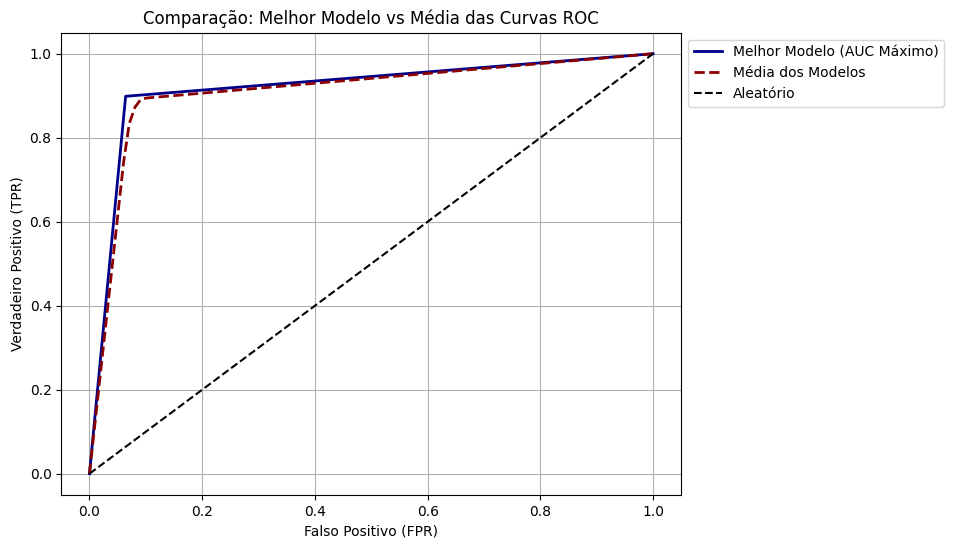

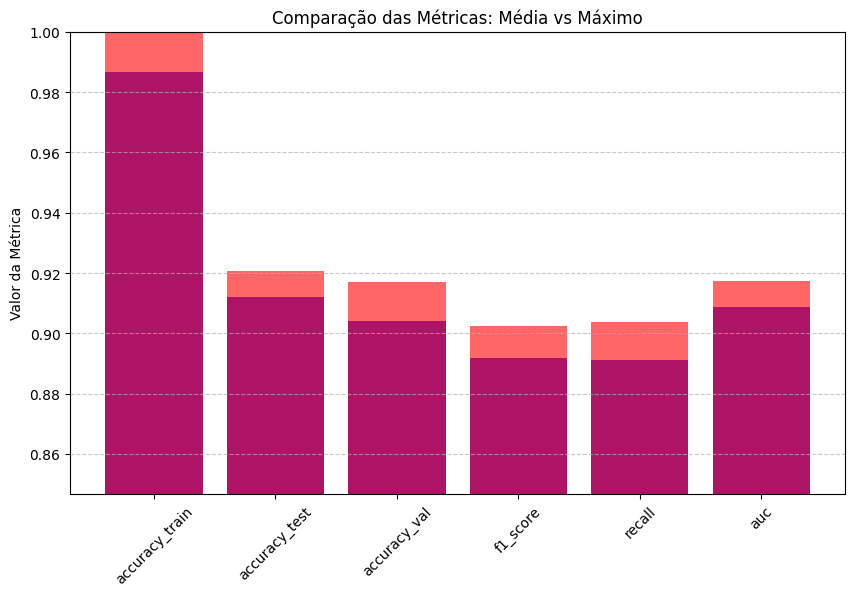

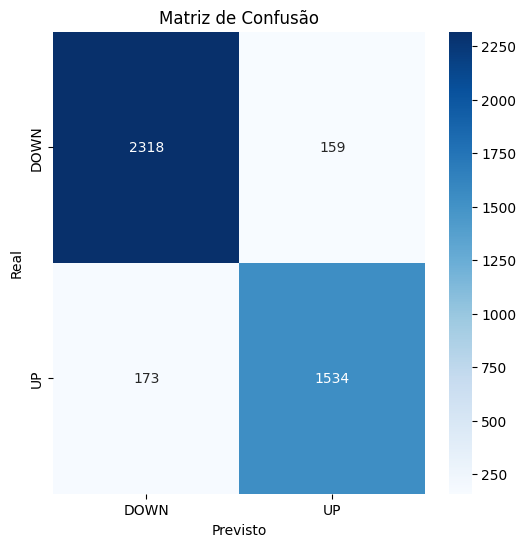

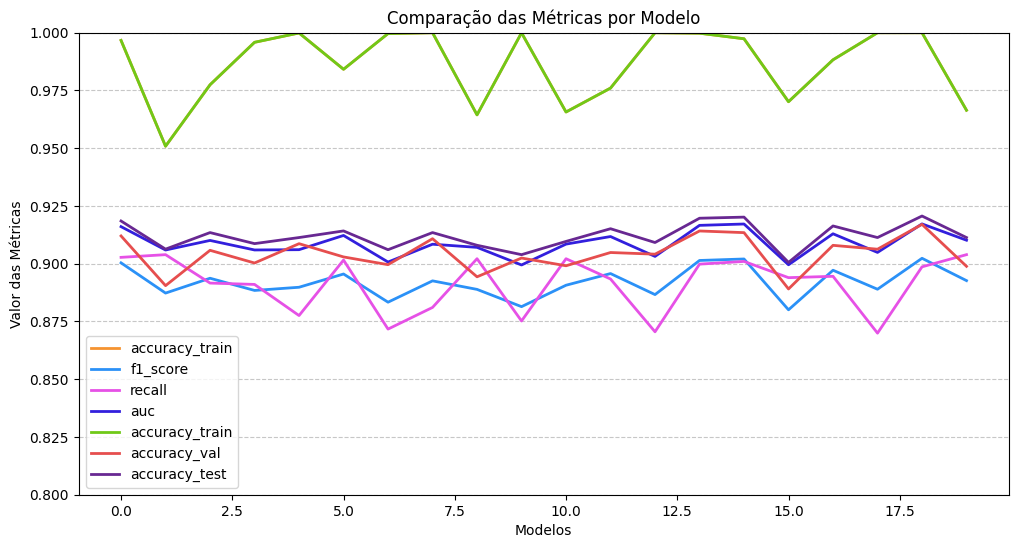

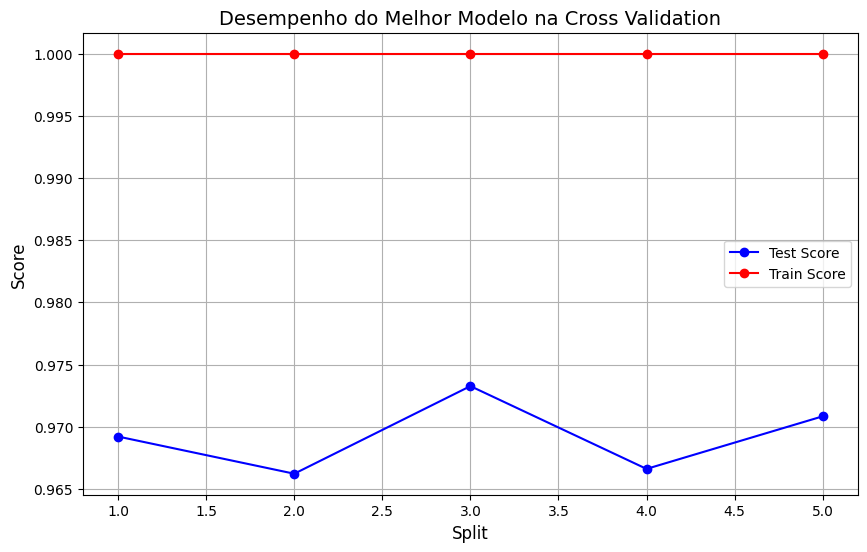

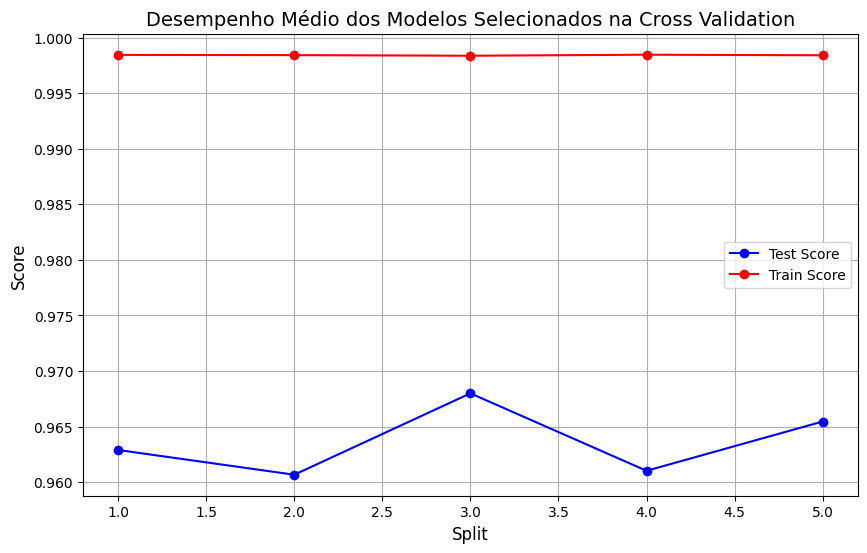

### Resultados do Modelo

**Melhores Parâmetros:**
```
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'log_loss', 'max_depth': 100, 'max_features': None, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 1000, 'n_jobs': -1, 'oob_score': False, 'random_state': 51, 'verbose': 0, 'warm_start': False}
```

#### Resultados das Métricas:
- **Accuracy train**:
  - **Melhor valor geral**: 1.0000
  - **Média**: 0.9866
  - **Desvio Padrão**: 0.0155
  - **Valor no Modelo Selecionado**: 1.0000

- **Accuracy val**:
  - **Melhor valor geral**: 0.9170
  - **Média**: 0.9041
  - **Desvio Padrão**: 0.0074
  - **Valor no Modelo Selecionado**: 0.9170

- **Accuracy test**:
  - **Melhor valor geral**: 0.9207
  - **Média**: 0.9119
  - **Desvio Padrão**: 0.0054
  - **Valor no Modelo Selecionado**: 0.9207

- **F1 score**:
  - **Melhor valor geral**: 0.9024
  - **Média**: 0.8920
  - **Desvio Padrão**: 0.0065
  - **Valor no Modelo Selecionado**: 0.9024

- **Auc**:
  - **Melhor valor geral**: 0.9172
  - **Média**: 0.9087
  - **Desvio Padrão**: 0.0055
  - **Valor no Modelo Selecionado**: 0.9172

- **Recall**:
  - **Melhor valor geral**: 0.9039
  - **Média**: 0.8913
  - **Desvio Padrão**: 0.0120
  - **Valor no Modelo Selecionado**: 0.8987



In [8]:
from IPython.display import display, Markdown

plots.show_best_roc(df)
plots.show_bar_metrics2(df)
plots.show_confusion_matrix(model, X_test, Y_test)
plots.show_metrics_comparison_line_plot(df)
plots.plot_cv_performance(cv, "Desempenho do Melhor Modelo na Cross Validation")
plots.plot_cv_performance(all_cv, "Desempenho Médio dos Modelos Selecionados na Cross Validation")
display(Markdown(util.generate_markdown_report(model, result.values())))